# Oat Bran and Cholesterol - A Randomized Crossover Experiment

## Setup

In [1]:
# 3rd party library imports
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

sns.set()

df = pd.read_csv('case1602.csv')

## Total serum cholesterol before treatment (baseline) and after dietary supplements of high- and low-fiber content

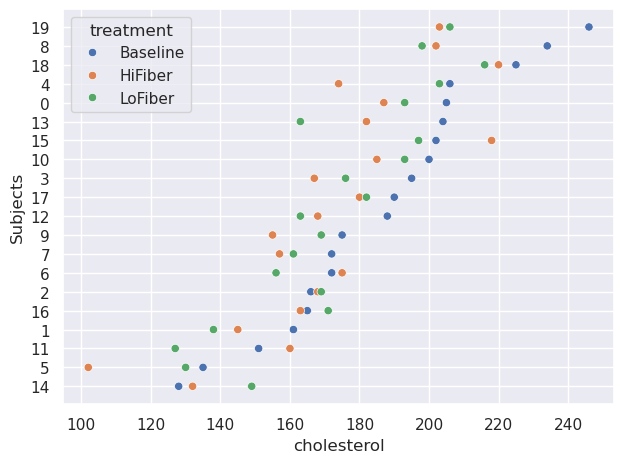

In [6]:
# wrangle the data so that seaborn can make a decent plot
data = (
    df.sort_values(by='Baseline')            # order roughly smallest to largest baseline
      .drop(labels='Order', axis='columns')  # don't use 'Order' as a treatment
      .reset_index()                         # move subject id out of index
      .reset_index()                         # new column for plot order
      .rename({'index': 'subject', 'level_0': 'plot_order'}, axis='columns')
      .set_index(['plot_order', 'subject'])  # isolate treatment variables
      .stack()                               # consolidate treatment variables into one column
      .reset_index()                         # move plot_order index into data frame
      .rename({'level_2': 'treatment', 0: 'cholesterol'}, axis='columns')
)

ax = sns.scatterplot(data=data, y='plot_order', x='cholesterol', hue='treatment')

ax.set_ylabel('Subjects')
ax.set_yticks(range(20))
ax.set_yticklabels(data.query('treatment == "Baseline"')['subject'].values)
ax.get_figure().tight_layout()
